In [2]:
# Cross-Country Solar Potential Comparison
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load all cleaned datasets
benin = pd.read_csv('../data/benin_clean.csv')
sierra_leone = pd.read_csv('../data/sierraleone_clean.csv') 
togo = pd.read_csv('../data/togo_clean.csv')

print("✅ All country datasets loaded!")
print(f"Benin: {benin.shape}, Sierra Leone: {sierra_leone.shape}, Togo: {togo.shape}")

# Add country labels for comparison
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine all data
all_countries = pd.concat([benin, sierra_leone, togo], ignore_index=True)
print(f"Combined dataset: {all_countries.shape}")

FileNotFoundError: [Errno 2] No such file or directory: '../data/sierraleone_clean.csv'

In [3]:
import os
print("Files in data folder:")
data_files = os.listdir('../data/')
for file in data_files:
    print(f"• {file}")

Files in data folder:
• benin-malanville.csv
• benin_clean.csv
• sierraleone-bumbuna.csv
• togo-dapaong_qc.csv


In [4]:
# Cross-Country Solar Potential Comparison
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load all cleaned datasets
benin = pd.read_csv('../data/benin_clean.csv')
sierra_leone = pd.read_csv('../data/sierraleone_clean.csv') 
togo = pd.read_csv('../data/togo_clean.csv')

print("✅ All country datasets loaded!")
print(f"Benin: {benin.shape}, Sierra Leone: {sierra_leone.shape}, Togo: {togo.shape}")

# Add country labels for comparison
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine all data
all_countries = pd.concat([benin, sierra_leone, togo], ignore_index=True)
print(f"Combined dataset: {all_countries.shape}")

FileNotFoundError: [Errno 2] No such file or directory: '../data/togo_clean.csv'

In [5]:
import os
print("All files in data folder:")
data_files = os.listdir('../data/')
for file in sorted(data_files):
    print(f"• {file}")

All files in data folder:
• benin-malanville.csv
• benin_clean.csv
• sierraleone-bumbuna.csv
• sierraleone_clean.csv
• togo-dapaong_qc.csv
• togo_clean.csv


In [6]:
# Load all cleaned datasets
benin = pd.read_csv('../data/benin_clean.csv')
sierra_leone = pd.read_csv('../data/sierraleone_clean.csv') 
togo = pd.read_csv('../data/togo_clean.csv')

print("✅ All country datasets loaded!")
print(f"Benin: {benin.shape}, Sierra Leone: {sierra_leone.shape}, Togo: {togo.shape}")

# Add country labels for comparison
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine all data
all_countries = pd.concat([benin, sierra_leone, togo], ignore_index=True)
print(f"Combined dataset: {all_countries.shape}")

✅ All country datasets loaded!
Benin: (517860, 22), Sierra Leone: (509308, 22), Togo: (516349, 22)
Combined dataset: (1543517, 23)


=== GHI COMPARISON ACROSS COUNTRIES ===


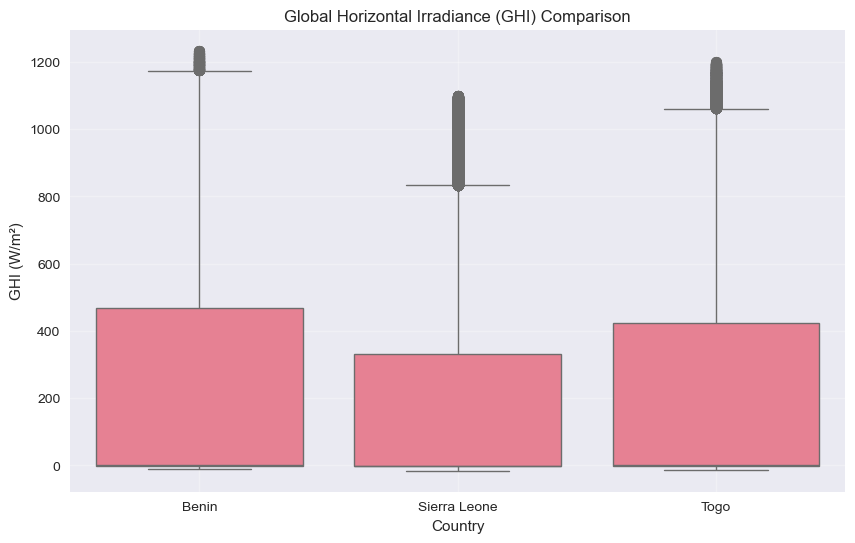

GHI Statistics by Country:
                mean  median     std
Country                             
Benin         236.23     0.7  328.29
Sierra Leone  185.00    -0.4  279.02
Togo          223.86     0.5  317.31


In [7]:
# BOXPLOT COMPARISON - GHI
print("=== GHI COMPARISON ACROSS COUNTRIES ===")
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_countries, x='Country', y='GHI')
plt.title('Global Horizontal Irradiance (GHI) Comparison')
plt.ylabel('GHI (W/m²)')
plt.xlabel('Country')
plt.grid(True, alpha=0.3)
plt.show()

# Calculate summary statistics
ghi_stats = all_countries.groupby('Country')['GHI'].agg(['mean', 'median', 'std'])
print("GHI Statistics by Country:")
print(ghi_stats.round(2))

=== DNI & DHI COMPARISON ===


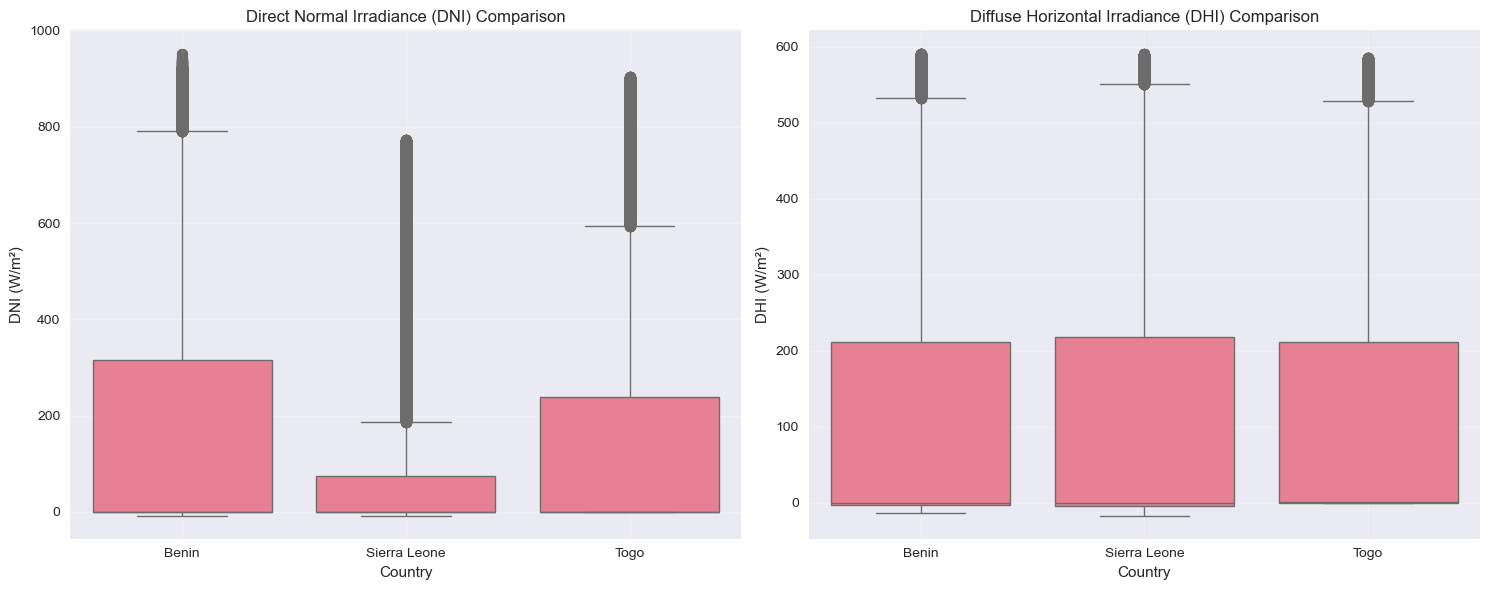

DNI Statistics by Country:
                mean  median     std
Country                             
Benin         166.90    -0.1  262.08
Sierra Leone  104.13    -0.1  200.95
Togo          147.98     0.0  247.68

DHI Statistics by Country:
                mean  median     std
Country                             
Benin         111.66     0.5  153.10
Sierra Leone  108.10    -0.6  153.69
Togo          112.78     1.5  151.57


In [8]:
# COMPARISON OF DNI AND DHI
print("=== DNI & DHI COMPARISON ===")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# DNI Boxplot
sns.boxplot(data=all_countries, x='Country', y='DNI', ax=axes[0])
axes[0].set_title('Direct Normal Irradiance (DNI) Comparison')
axes[0].set_ylabel('DNI (W/m²)')
axes[0].grid(True, alpha=0.3)

# DHI Boxplot
sns.boxplot(data=all_countries, x='Country', y='DHI', ax=axes[1])
axes[1].set_title('Diffuse Horizontal Irradiance (DHI) Comparison')
axes[1].set_ylabel('DHI (W/m²)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print("DNI Statistics by Country:")
dni_stats = all_countries.groupby('Country')['DNI'].agg(['mean', 'median', 'std'])
print(dni_stats.round(2))

print("\nDHI Statistics by Country:")
dhi_stats = all_countries.groupby('Country')['DHI'].agg(['mean', 'median', 'std'])
print(dhi_stats.round(2))

In [9]:
# STATISTICAL TESTING - Are differences significant?
print("=== STATISTICAL SIGNIFICANCE TEST ===")

# One-way ANOVA test
benin_ghi = all_countries[all_countries['Country'] == 'Benin']['GHI']
sierra_ghi = all_countries[all_countries['Country'] == 'Sierra Leone']['GHI']
togo_ghi = all_countries[all_countries['Country'] == 'Togo']['GHI']

f_stat, p_value = f_oneway(benin_ghi, sierra_ghi, togo_ghi)

print(f"ANOVA F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.10f}")

if p_value < 0.05:
from scipy.stats import f_oneway

    print("✅ STATISTICALLY SIGNIFICANT: Countries have different solar potential")
else:
    print("❌ NOT STATISTICALLY SIGNIFICANT: Differences could be due to chance")

print(f"\nConfidence level: {(1-p_value)*100:.2f}%")

IndentationError: expected an indented block after 'if' statement on line 14 (3560222873.py, line 15)

In [10]:
# STATISTICAL TESTING - Are differences significant?
print("=== STATISTICAL SIGNIFICANCE TEST ===")

from scipy.stats import f_oneway

# One-way ANOVA test
benin_ghi = all_countries[all_countries['Country'] == 'Benin']['GHI']
sierra_ghi = all_countries[all_countries['Country'] == 'Sierra Leone']['GHI']
togo_ghi = all_countries[all_countries['Country'] == 'Togo']['GHI']

f_stat, p_value = f_oneway(benin_ghi, sierra_ghi, togo_ghi)

print(f"ANOVA F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.10f}")

if p_value < 0.05:
    print("✅ STATISTICALLY SIGNIFICANT: Countries have different solar potential")
else:
    print("❌ NOT STATISTICALLY SIGNIFICANT: Differences could be due to chance")

print(f"\nConfidence level: {(1-p_value)*100:.2f}%")

=== STATISTICAL SIGNIFICANCE TEST ===
ANOVA F-statistic: 3833.18
P-value: 0.0000000000
✅ STATISTICALLY SIGNIFICANT: Countries have different solar potential

Confidence level: 100.00%
